# Evaluate classification results per cancer type, Figure2

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import sys,os
from collections import defaultdict, Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap

In [3]:
print(sys.version)

3.7.4 (default, Jan  6 2021, 18:10:47) 
[Clang 11.0.3 (clang-1103.0.32.29)]


In [4]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn"

matplotlib                        3.3.4
numpy                             1.19.5
pandas                            1.2.3
scipy                             1.6.1
seaborn                           0.11.1
You should consider upgrading via the '/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [6]:
store="../results/"

In [9]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_after_clustering.tsv"
               ,sep="\t",index_col=0)

In [10]:
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']
dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey"}
cluster_orders=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE"]
dict_cluster_order_number={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}

# Compare subtype ratio per cancer type

In [11]:
tcga_count=pd.crosstab(df["cluster_m2_names"],df["CancerType"])
tcga_count=tcga_count.reindex(cluster_orders,axis=0).fillna(0)
tcga_ratio=tcga_count.apply(lambda x: x/np.sum(x) )*100
tcga_ratio

CancerType,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM
cluster_m2_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25


In [12]:
# make cancer colors
rgbs1=sns.color_palette("tab20", 20)
rgbs2=sns.color_palette("tab20b", 20)
rgbs1_3=[] 
for i,x in enumerate(rgbs1):
    if (i%4)!=0:
        rgbs1_3.append(x)
rgbs2_3=[] 
for i,x in enumerate(rgbs2):
    if (i%4)!=0:
        rgbs2_3.append(x)

cancer30_colors = sns.color_palette(rgbs1_3+rgbs2_3, 30)

In [13]:
cancers_freq_order=[x[0] for x in Counter( df["CancerType"]).most_common()]

In [14]:
dict_cancer_colors={ cancer:color for cancer,color in zip(cancers_freq_order,cancer30_colors)}
dict_cancer_colors["Others"]="whitesmoke"
dict_cancer_colors[""]="whitesmoke"

In [15]:
bwr=LinearSegmentedColormap.from_list('bwr', [(0,"blue"),(0.5,"w"),(1,"red")] )
wk=LinearSegmentedColormap.from_list('wk', [(0,"w"),(1,"k")] )
wr=LinearSegmentedColormap.from_list('wr', [(0,"w"),(1,"red")] )

In [17]:
nbdc=pd.read_csv("../data/tgs_results/NBDC_tgs.tsv",sep="\t",index_col=0)
nbdc.head()

,CancerType,KNN,SVC,RF,LR,Cons,Details
UCEC12,UCEC,APB,APB,APB,APB,APB,APB:4
UCEC05,UCEC,POL,POL,POL,POL,POL,POL:4
UCEC10,UCEC,POL,POL,POL,POL,POL,POL:4
UCEC13,UCEC,POL,POL,POL,POL,POL,POL:4
UCEC26,UCEC,POL,POL,POL,POL,POL,POL:4


In [18]:
nbdc_count=pd.crosstab( nbdc["Cons"], nbdc["CancerType"])
nbdc_count.drop("UND",inplace=True)
nbdc_count=nbdc_count.reindex(cluster_orders,axis=0).fillna(0)
nbdc_ratio=nbdc_count.apply(lambda x: x/np.sum(x) )*100
nbdc_ratio

CancerType,BRCA,CRC,LUAD,OV,STAD,TNBC,UCEC
Cons,,,,,,,
SMK,0.000000,0.000000,41.463415,0.000000,5.660377,0.000000,0.000000
UVL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
APB,19.354839,0.000000,9.756098,1.639344,5.660377,13.888889,1.470588
POL,0.000000,1.219512,0.000000,0.000000,0.000000,0.000000,16.176471
MRD,0.000000,2.439024,0.000000,0.000000,16.981132,0.000000,22.058824
HRD,29.032258,18.292683,19.512195,90.163934,28.301887,61.111111,4.411765
GNS,3.225806,0.000000,9.756098,1.639344,0.000000,13.888889,1.470588
AGE,48.387097,78.048780,19.512195,6.557377,43.396226,11.111111,54.411765


In [19]:
cptac=pd.read_csv("../data/CPTAC_tgs_irs.tsv",sep="\t")

In [20]:
cptac_count=pd.crosstab(cptac["Cons"],cptac["CancerType2"])
cptac_count=cptac_count.reindex(cluster_orders,axis=0).fillna(0)
cptac_ratio=cptac_count.apply(lambda x: x/np.sum(x) )*100
cptac_ratio.rename(columns={"HSOC":"OV"},inplace=True)
cptac_ratio

CancerType2,BRCA,BRN,CRC,HNC,OV,KRC,LUAD,LUSC,PAAD,UCEC
Cons,,,,,,,,,,
SMK,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [21]:
keynotes=pd.read_csv("../data/tgs_results/KEYNOTEs_all_tgs.tsv",sep="\t")

In [23]:
keynotes_s=pd.read_csv("../data/tgs_results/KEYNOTEs_HNSC_SKCM_tgs.tsv",sep="\t")

In [24]:
keynotes_count=pd.crosstab(keynotes_s["Cons"],keynotes_s["CancerType"])
keynotes_count=keynotes_count.reindex(cluster_orders,axis=0).fillna(0)
keynotes_ratio=keynotes_count.apply(lambda x: x/np.sum(x) )*100
keynotes_ratio

CancerType,HNSC,SKCM
Cons,,
SMK,13.0,0.000000
UVL,2.0,83.720930
APB,35.0,0.000000
POL,0.0,0.000000
MRD,0.0,0.000000
HRD,14.0,11.627907
GNS,0.0,0.000000
AGE,36.0,4.651163


In [25]:
import glob
files=glob.glob("../data/tgs_results/*tgs.tsv")
names=[os.path.basename(x).replace("_tgs.tsv","") for x in files]
names

['nsclc_mskcc_2018',
 'NBDC',
 'hnsc_mdanderson_2013',
 'Plos2017_BLCA',
 'brca_broad',
 'Cell2017_MEL',
 'blca_cornell_2016',
 'mixed_allen_2018_mel',
 'mixed_allen_2018_lung',
 'Science2015_MEL',
 'mixed_allen_2018_blca',
 'paad_icgc',
 'NatMed2019_MEL',
 'ccrcc_dfci_2019',
 'luad_mskcc_2015',
 'hnsc_jhu',
 'KEYNOTEs_all',
 'hnsc_broad',
 'Nature2018_BLCA',
 'brca_sanger',
 'mel_dfci_2019',
 'NatCan2020_NSCLC36',
 'SciTra2017_MEL',
 'Nejm2014_MEL',
 'Cell2016_MEL',
 'lgg_ucsf_2014',
 'blca_bgi',
 'luad_oncosg_2020',
 'blca_dfarber_mskcc_2014',
 'KEYNOTEs_HNSC_SKCM',
 'mel_ucla_2016',
 'coadread_dfci_2016',
 'Science2015_LUAD',
 'NatCom2018_NSCLC',
 'luad_broad',
 'skcm_dfci_2015',
 'coadread_genentech',
 'paad_utsw_2015']

In [26]:
all_ratio, all_count=pd.DataFrame(), pd.DataFrame()
for path,name in zip(files,names):
    tmp_df=pd.read_csv(path,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    tmp_df=tmp_df[tmp_df["Cons"]!="UND"]
    count=tmp_df.groupby("Cons").count()[[name]].reindex(index=cluster_orders).fillna(0)
    ratio=count/np.sum(count)*100
    all_ratio=pd.concat( [all_ratio,ratio],axis=1)
    all_count=pd.concat( [all_count,count],axis=1)

In [27]:
cancertype="LUNG"
dfs=[ tcga_count[["LUSC","LUAD"]],
     cptac_count[["LUSC","LUAD"]],
     nbdc_count["LUAD"],
     all_count["NatCan2020_NSCLC36"],
     all_count["NatCom2018_NSCLC"],
     all_count["Science2015_LUAD"],
     all_count[['luad_broad',"nsclc_mskcc_2018",
                   'mixed_allen_2018_lung',]]]
names=["TCGA LUSC","TCGA LUAD","CPTAC LUSC","CPTAC LUAD","NBDC LUAD",
      "NatCan2020","NatCom2018","Science2015",
       'luad_broad',"nsclc_mskcc_2018", 'mixed_allen_2018_lung',]

TCGA LUSC [n=492]
TCGA LUAD [n=515]
CPTAC LUSC [n=102]
CPTAC LUAD [n=105]
NBDC LUAD [n=41]
NatCan2020 [n=36]
NatCom2018 [n=34]
Science2015 [n=32]
luad_broad [n=155]
nsclc_mskcc_2018 [n=75]
mixed_allen_2018_lung [n=53]


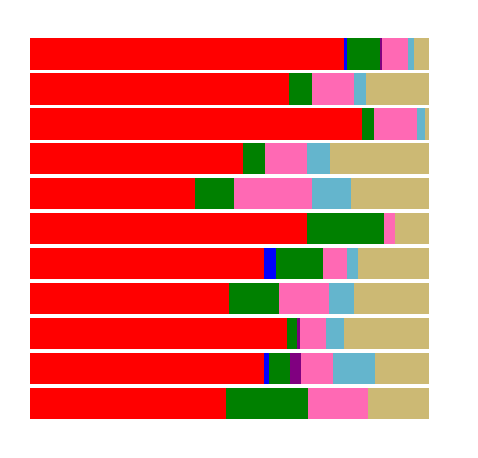

In [28]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()
#plt.savefig(store+"Subtype_frequency_comp_"+cancertype+".png",dpi=300,bbox_inches="tight")

In [29]:
cancertype="SKCM"
dfs=[ tcga_count[cancertype], 
     keynotes_count[cancertype],
     all_count["NatMed2019_MEL"],
     all_count["Science2015_MEL"],
     all_count["Cell2017_MEL"],
     all_count["Nejm2014_MEL"],  
     all_count["Cell2016_MEL"],
     all_count["mixed_allen_2018_mel"],
     all_count["mel_dfci_2019"],
     all_count['skcm_dfci_2015'],
     all_count['mel_ucla_2016']]
names=["TCGA","KEYNOTE",'NatMed2019',"Science2015","Cell2017","Nejm2014","Cell2016",
       'mixed_allen_2018_mel',"mel_dfci_2019",'skcm_dfci_2015','mel_ucla_2016']

TCGA [n=467]
KEYNOTE [n=86]
NatMed2019 [n=134]
Science2015 [n=98]
Cell2017 [n=62]
Nejm2014 [n=62]
Cell2016 [n=36]
mixed_allen_2018_mel [n=145]
mel_dfci_2019 [n=139]
skcm_dfci_2015 [n=108]
mel_ucla_2016 [n=37]


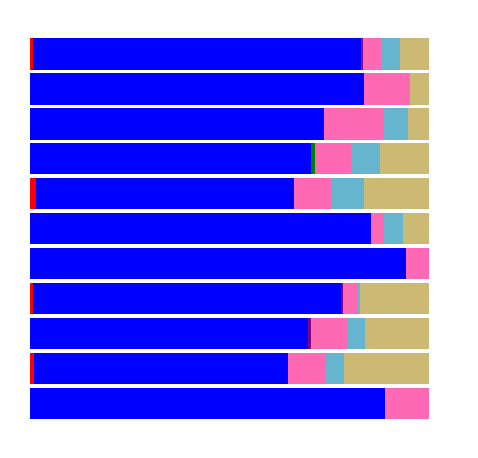

In [30]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

In [31]:
cancertype="BLCA"
dfs=[ tcga_count[cancertype],
     all_count[["Nature2018_BLCA","blca_bgi", 'blca_cornell_2016',
 'blca_dfarber_mskcc_2014','mixed_allen_2018_blca']] ] 
names=["TCGA","Nature_2018","blca_bgi",'blca_cornell_2016', 'blca_dfarber_mskcc_2014'
        ,'mixed_allen_2018_blca']

TCGA [n=412]
Nature_2018 [n=182]
blca_bgi [n=92]
blca_cornell_2016 [n=70]
blca_dfarber_mskcc_2014 [n=49]
mixed_allen_2018_blca [n=25]


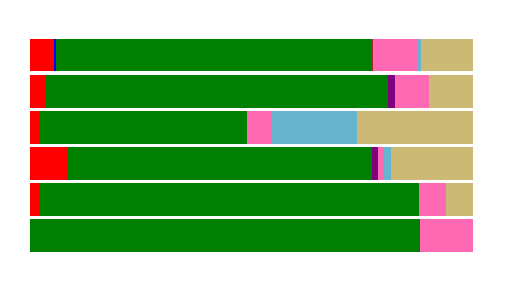

In [32]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(2,0.17*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=985]
CPTAC [n=122]
NBDC [n=62]
brca_broad [n=98]
brca_sanger [n=100]


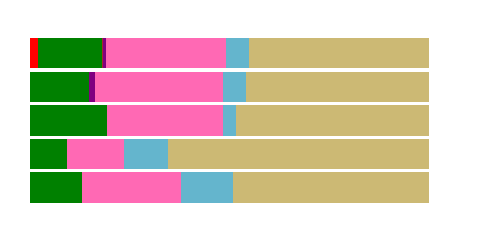

In [33]:
cancertype="BRCA"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[['brca_broad','brca_sanger']] ]
names=["TCGA","CPTAC","NBDC", 'brca_broad', 'brca_sanger']

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=533]
CPTAC [n=102]
NBDC [n=82]
coadread_dfci_2016 [n=616]
coadread_genentech [n=72]


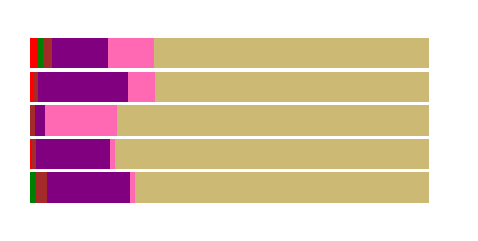

In [34]:
cancertype="CRC"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[["coadread_dfci_2016",'coadread_genentech',]] ]
names=["TCGA","CPTAC","NBDC",
       "coadread_dfci_2016",'coadread_genentech',]

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

HNSC
TCGA [n=507]
CPTAC [n=98]
KEYNOTE [n=100]
hnsc_broad [n=72]


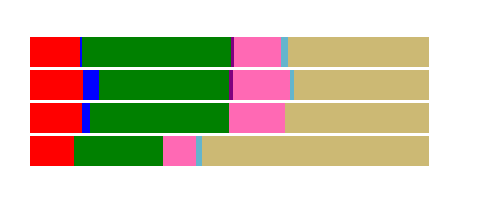

In [35]:
cancertype="HNSC"
dfs=[ tcga_count[cancertype], cptac_count["HNC"],keynotes_count[cancertype],
     all_count['hnsc_broad']]
names=["TCGA","CPTAC", 'KEYNOTE','hnsc_broad']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

RCC
TCGA KIRC [n=336]
TCGA KIRP [n=281]
CPTAC KRC [n=100]
ccrcc_dfci_2019 [n=31]


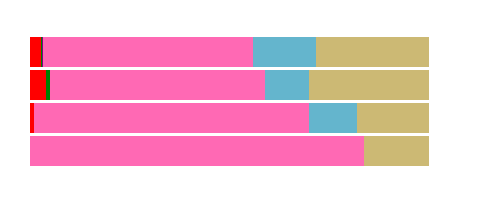

In [36]:
cancertype="RCC"
dfs=[ tcga_count["KIRC"], tcga_count["KIRP"], cptac_count["KRC"], 
     all_count['ccrcc_dfci_2019' ]]
names=["TCGA KIRC","TCGA KIRP","CPTAC KRC",     
       'ccrcc_dfci_2019',]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

BRN
TCGA GBM [n=390]
TCGA LGG [n=507]
CPTAC BRN [n=97]
lgg_ucsf_2014 [n=56]


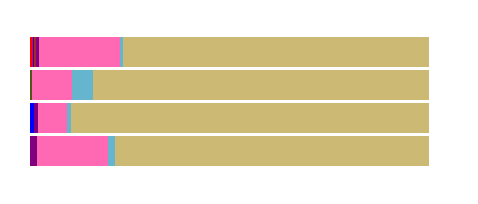

In [37]:
cancertype="BRN"
dfs=[ tcga_count[["GBM","LGG"]], cptac_count["BRN"],all_count[[ 'lgg_ucsf_2014',]]]
names=["TCGA GBM","TCGA LGG",  "CPTAC BRN", 'lgg_ucsf_2014']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

PAAD
TCGA [n=177]
CPTAC [n=130]
paad_utsw_2015 [n=106]
paad_icgc [n=97]


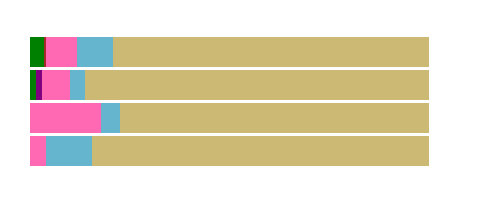

In [38]:
cancertype="PAAD"
dfs=[ tcga_count["PAAD"] , cptac_count["PAAD"] ,all_count[['paad_utsw_2015','paad_icgc',]]]
names=["TCGA","CPTAC",'paad_utsw_2015',  'paad_icgc', ]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

OV
TCGA [n=435]
CPTAC [n=93]
NBDC [n=61]


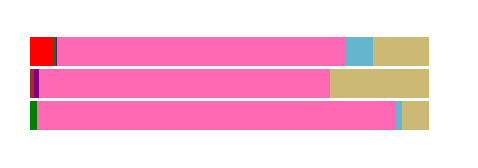

In [39]:
cancertype="OV"
dfs=[ tcga_count[cancertype], cptac_count["HSOC"],nbdc_count[cancertype]]
names=["TCGA","CPTAC",  "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
print(cancertype)
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=530]
CPTAC [n=98]
NBDC [n=68]


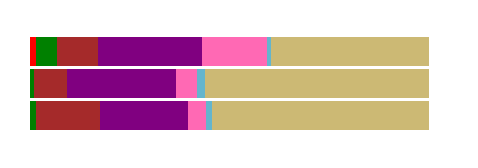

In [40]:
cancertype="UCEC"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype]]
names=["TCGA","CPTAC", "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

# Concordance ratio

In [41]:
keynotes["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in keynotes["Details"]]
counter=Counter( keynotes["top_count"]).most_common()
counter

[(4, 261), (3, 38), (2, 12)]

/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


3.858520900321544


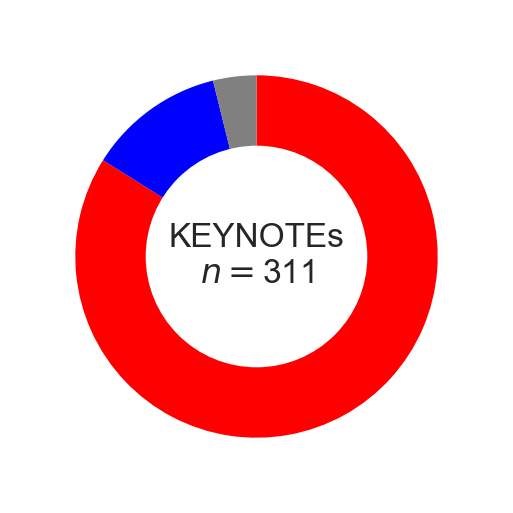

In [42]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3",""]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"KEYNOTEs\n$n=$"+str(len(keynotes)).format(len(keynotes)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

In [43]:
cptac["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in cptac["Details"] ]
counter=Counter( cptac["top_count"]).most_common()
counter

[(4, 953), (3, 94), (2, 44)]

4.032997250229148


/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


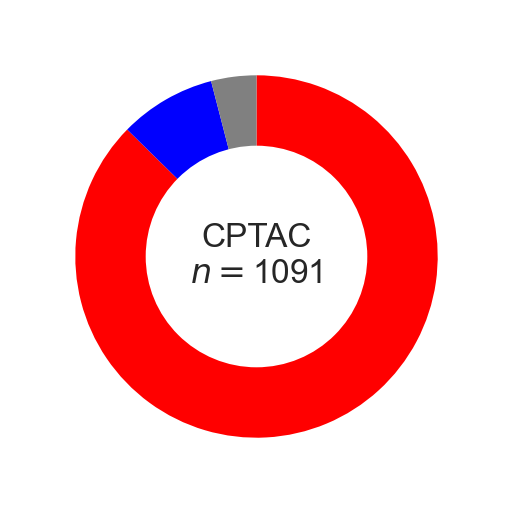

In [44]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"CPTAC\n$n=$"+str(len(cptac)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [45]:
nbdc["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in nbdc["Details"] ]
counter=Counter( nbdc["top_count"]).most_common()
counter

[(4, 335), (3, 68), (2, 10)]

2.4213075060532687


/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


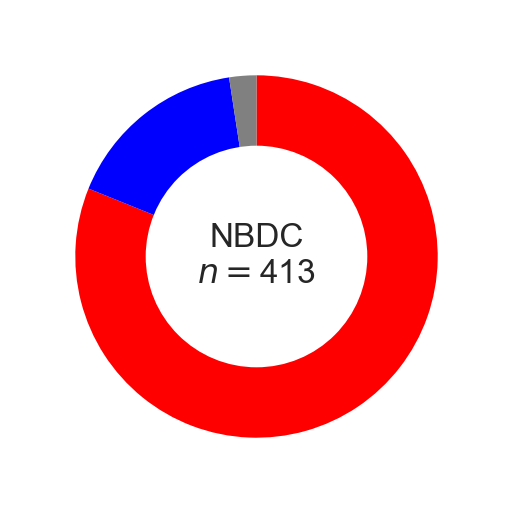

In [46]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"NBDC\n$n=$"+str(len(nbdc)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [47]:
cbio_frozen_names=['luad_broad',  'brca_broad', 'brca_sanger',
                   'coadread_genentech',"blca_bgi",
'hnsc_broad','paad_utsw_2015',  'paad_icgc', 'lgg_ucsf_2014']

In [48]:
cbio_ffpe_names=['mixed_allen_2018_mel',"mel_dfci_2019",'mel_ucla_2016',
                'mixed_allen_2018_lung',
                 'blca_cornell_2016', 'blca_dfarber_mskcc_2014'
        ,'mixed_allen_2018_blca',"ccrcc_dfci_2019", "coadread_dfci_2016",]

In [49]:
top_counts=[]
for name in cbio_ffpe_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)

In [50]:
Counter( top_counts)

Counter({4: 1112, 3: 53, 2: 27})

2.2651006711409396


/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


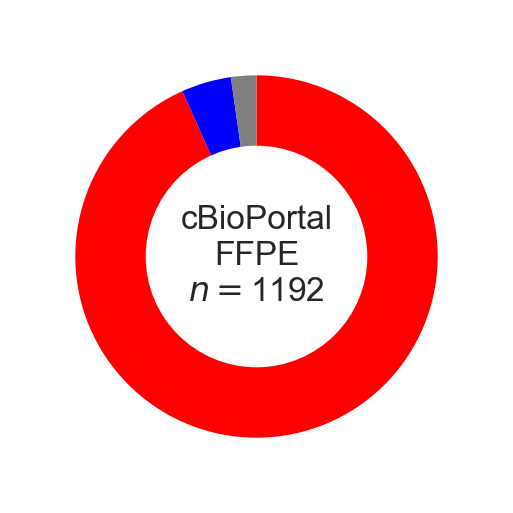

In [51]:
counter=Counter( top_counts).most_common()
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFFPE\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

3.085714285714286


/Users/takamatsushiro/.pyenv/versions/3.7.4/envs/MSigPred_2021/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.


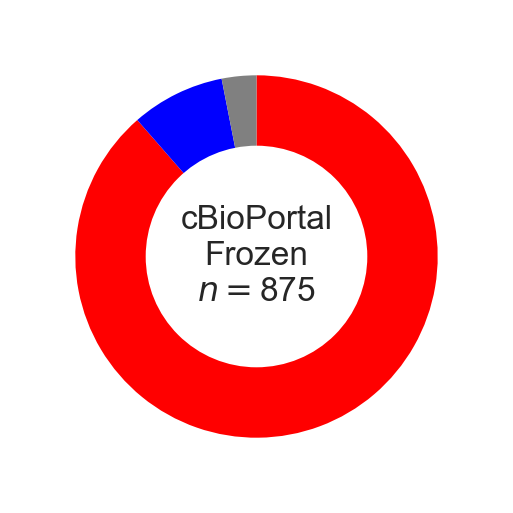

In [52]:
top_counts=[]
for name in cbio_frozen_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)
    
counter=Counter( top_counts).most_common()

# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFrozen\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

# CPTAC gene expression

In [54]:
irs_list=["CD8A_log","GZMB_log","IFNG_log","PDCD1_log","CTLA4_log", "CYT_log","GEP_score",]

In [55]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [56]:
cptac_cancer_orders=['LUSC', 'LUAD','HNC', 'UCEC', 'CRC', 'BRCA', 'HSOC', 'BRN',"PAAD", 'KRC']

In [57]:
for irs in irs_list:
    cptac.loc[:,irs+"_z"]=stats.zscore(cptac.loc[:,irs],nan_policy="omit")

In [58]:
irs_list_z=[x+"_z" for x in irs_list]

CD8A
GZMB
IFNG
PDCD1
CTLA4
CYT
GEP_score
LUSC
LUAD
HNC
UCEC
CRC
BRCA
HSOC
BRN
PAAD
KRC


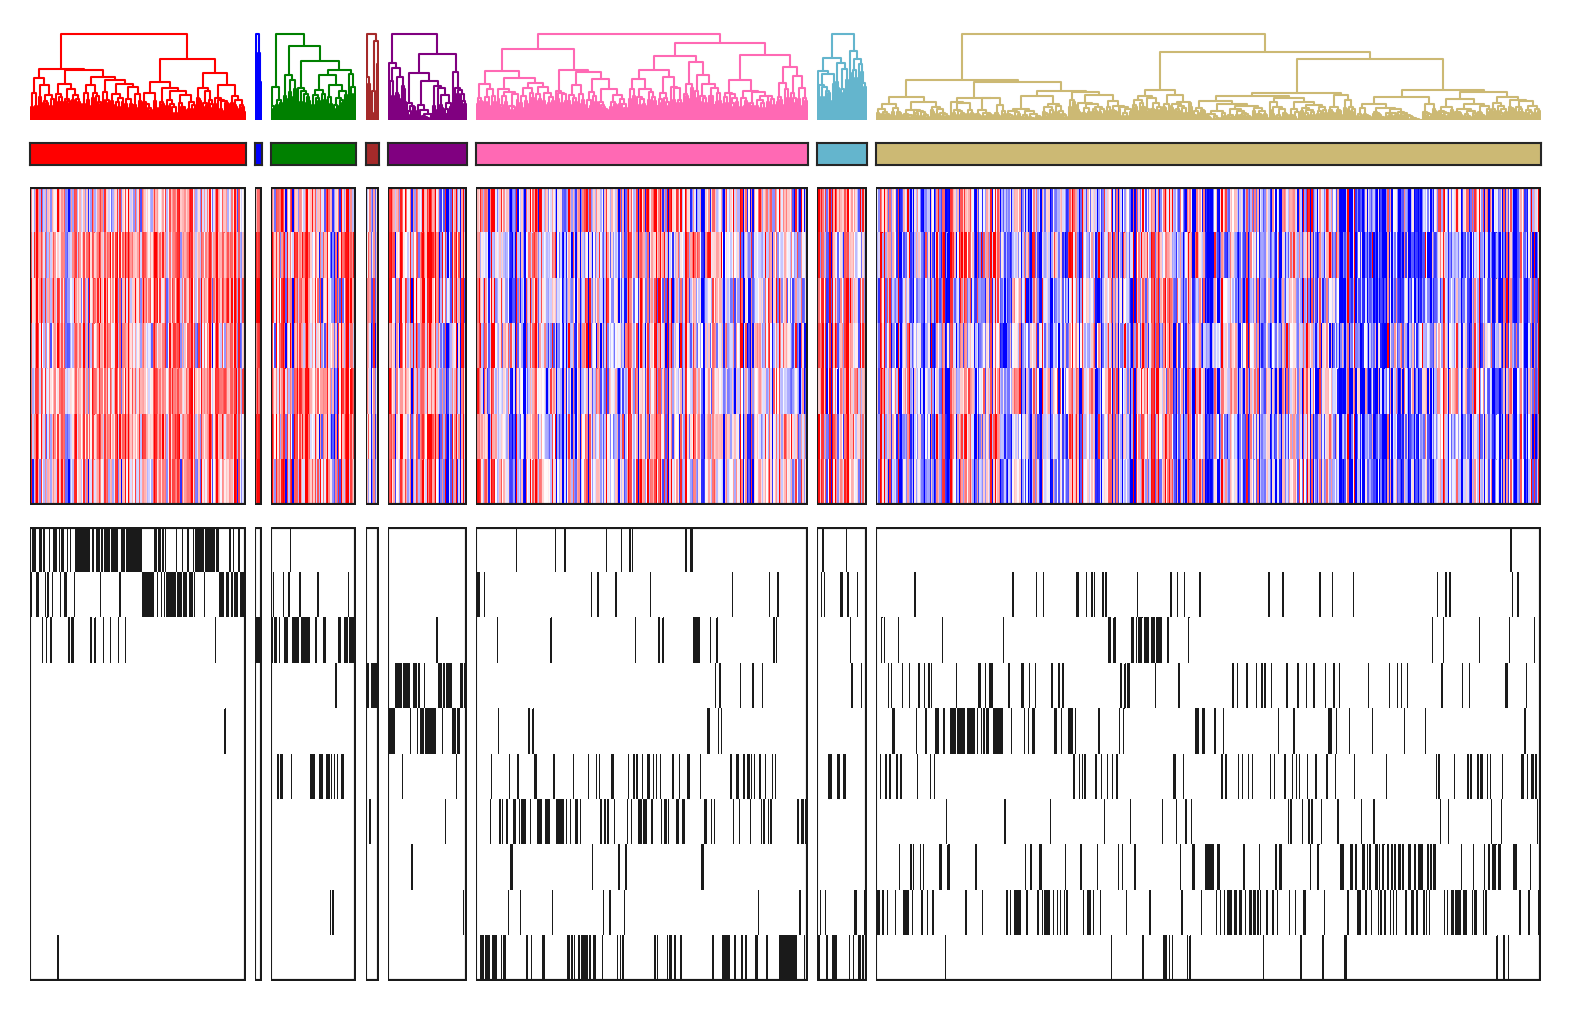

In [59]:
fig = plt.figure(figsize=(6.5,4.2))
plt_df=cptac.copy()
widths = [ len( plt_df[plt_df["Cons"]==cluster]) for cluster in cluster_orders]
heights = [2,0.5, len(irs_list), len(cptac_cancer_orders)]

spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights),
                        width_ratios=widths, height_ratios=heights, wspace=0.05,hspace=0.1)

for i,cluster in enumerate(cluster_orders):
    
    selected_df=plt_df[ plt_df["Cons"]==cluster]
    selected_mutsig=np.log10( selected_df.loc[:, selected_df.columns.str.contains("Signature_")] +1)
    z = linkage(selected_mutsig, metric='euclidean', method='ward')
    ax = fig.add_subplot(spec[0, i])
    with plt.rc_context({'lines.linewidth': 0.5}):
        d=dendrogram(z,color_threshold=0,above_threshold_color=dict_cluster_colors[cluster],
                 ax=ax, no_labels=True)
    ax.set_axis_off()
    
    selected_df_order= selected_df.iloc[d["leaves"],:]
    
    ax = fig.add_subplot(spec[2, i])
    sns_df=selected_df_order[ irs_list_z]   
    mask = np.zeros_like(sns_df)
    mask[np.triu_indices_from(mask)] = True    
    sns.heatmap(sns_df.T,cmap=bwr, xticklabels=0,yticklabels=0,vmin=-1.5,vmax=1.5,cbar=False,ax=ax) 
    ax.set_xlabel("")
    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=sns_df.shape[1], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=0.5)
    ax.axvline(x=sns_df.shape[0], color='k',linewidth=1)
    
    ax = fig.add_subplot(spec[3, i])
    sns_df=pd.get_dummies( selected_df_order["CancerType2"])
    sns_df=sns_df.reindex( cptac_cancer_orders,axis=1).fillna(0)
    sns.heatmap(sns_df.T,cmap=wk,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    ax.set_xlabel("")
    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=sns_df.shape[1], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=0.5)
    ax.axvline(x=sns_df.shape[0], color='k',linewidth=1)
    
    ax = fig.add_subplot(spec[1, i],facecolor =dict_cluster_colors[cluster])
    #ax.set_axis_off()
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
for i in irs_list_z:
    print(i.replace("_z","").replace("_log",""))
for i in cptac_cancer_orders:
    print(i)
    
#plt.savefig("20201010/"+"CPTAC_cluster_IRS_comp.png",dpi=300,bbox_inches="tight")

In [60]:
plt_df=cptac.copy()
mean_by_cluster=plt_df[irs_list_z+["Cons"]].groupby("Cons").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders]
mean_by_cluster

Cons,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A_log_z,0.280395,0.351785,0.366202,0.109416,0.342682,0.141440,0.556382,-0.317221
GZMB_log_z,0.587766,0.733344,0.548433,0.331670,0.559835,-0.028987,0.001393,-0.352984
IFNG_log_z,0.564614,1.125475,0.531233,0.447803,0.575599,-0.030006,0.299386,-0.378268
PDCD1_log_z,0.408366,0.611382,0.426214,0.150611,0.242194,-0.020919,0.486180,-0.264769
CTLA4_log_z,0.565982,0.463251,0.647953,0.124643,0.245941,-0.158680,0.325899,-0.272199
CYT_log_z,0.609354,0.775242,0.496322,0.208393,0.431900,-0.030950,0.281988,-0.366940
GEP_score_z,0.358597,0.876826,0.578086,0.058887,0.282334,0.091581,0.435983,-0.348534


In [61]:
mean_by_cluster_raw=cptac[irs_list+["Cons"]].groupby("Cons").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders]
mean_by_cluster_raw

Cons,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A_log,3.602098,3.672406,3.686605,3.433708,3.663441,3.465247,3.873905,3.013532
GZMB_log,4.531377,4.714170,4.481989,4.209813,4.496305,3.756959,3.795105,3.350138
IFNG_log,2.230775,2.804286,2.196641,2.111329,2.242008,1.622743,1.959565,1.266626
PDCD1_log,3.117732,3.300350,3.133787,2.885874,2.968256,2.731578,3.187728,2.512229
CTLA4_log,4.602333,4.479651,4.700223,4.075282,4.220137,3.736934,4.315624,3.601369
CYT_log,4.278736,4.446065,4.164723,3.874293,4.099741,3.632871,3.948528,3.293964
GEP_score,94.417506,100.560000,97.019081,90.865100,93.513579,91.252617,95.334750,86.036000


CD8A_log_z
GZMB_log_z
IFNG_log_z
PDCD1_log_z
CTLA4_log_z
CYT_log_z
GEP_score_z


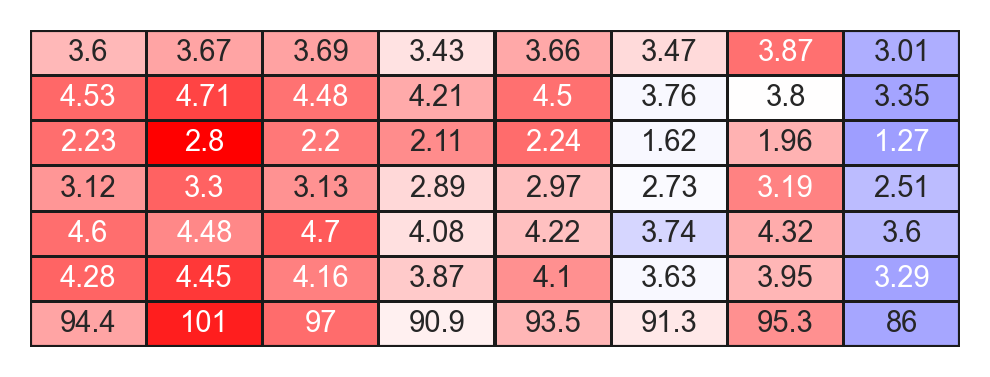

In [62]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(4,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)